In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
retail_data = pd.read_csv("datasets/clean_retail_data.csv")

retail_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Quarter,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,4,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,1,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,1,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2,2010


#### splitting the data into train and test dataset (determine weekly sales)

In [4]:
X = retail_data.drop(columns=["Weekly_Sales"])

y = retail_data["Weekly_Sales"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(retail_data.drop(columns=["Weekly_Sales"]), 
                                                    retail_data["Weekly_Sales"], 
                                                    test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4167, 9), (1786, 9), (4167,), (1786,))

#### making using of column transformer to transform the dataset

* columntransformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
* onehotencorder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

* here we are converting store, location region, discount, weekend and week day are converted using onehotencoding and encoding we will delete the old column using the parameter drop="first". Note that Holiday_flag is already one hot encoded.
* we are converting them using onehotencoding because they dont have any particular weights or ranking (nominal not ordinal)
* remainder="passthrough" means that the columns that we didnt specify we will let them passthrough if we want we can drop it also using reminder="drop"

In [6]:
transformer = ColumnTransformer(transformers=
    [
      ("one_hot_enc", OneHotEncoder(sparse=False, drop="first"), ["Store",  
                                                                  "Month", 
                                                                  "Quarter",
                                                                  "Year"])
    ], remainder="passthrough")

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_enc',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Store', 'Month', 'Quarter', 'Year'])])

Transformed Dataframe is obtained . Categorical cols are one hot encoded. Remainder columns('remainder__Temperature','remainder__Fuel_Price', 'remainder__CPI','remainder__Unemployment') are scaled

In [7]:
transformed_X_train = pd.DataFrame(transformer.fit_transform(X_train), 
                                   columns=transformer.get_feature_names_out(), index=X_train.index)

transformed_X_train.head(10)

,one_hot_enc__Store_2,one_hot_enc__Store_3,one_hot_enc__Store_4,one_hot_enc__Store_5,one_hot_enc__Store_6,one_hot_enc__Store_7,one_hot_enc__Store_8,one_hot_enc__Store_9,one_hot_enc__Store_10,one_hot_enc__Store_11,...,one_hot_enc__Quarter_2,one_hot_enc__Quarter_3,one_hot_enc__Quarter_4,one_hot_enc__Year_2011,one_hot_enc__Year_2012,remainder__Holiday_Flag,remainder__Temperature,remainder__Fuel_Price,remainder__CPI,remainder__Unemployment
422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,78.36,3.717,226.112207,6.334
1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,41.57,4.163,137.978133,8.150
1743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,76.01,2.779,182.616521,8.743
1367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,48.36,3.541,129.984548,7.874
5713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,34.90,2.846,126.983581,7.610
4448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,41.13,2.752,126.669267,10.210
3165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,46.00,4.061,134.357100,8.212
4092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,66.97,3.877,221.202107,6.891
4647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,41.59,3.389,140.528765,8.745
2601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,75.34,2.779,204.821704,7.527


#### all the column names after column transformation

In [8]:
predictors = transformed_X_train.columns

predictors

Index(['one_hot_enc__Store_2', 'one_hot_enc__Store_3', 'one_hot_enc__Store_4',
       'one_hot_enc__Store_5', 'one_hot_enc__Store_6', 'one_hot_enc__Store_7',
       'one_hot_enc__Store_8', 'one_hot_enc__Store_9', 'one_hot_enc__Store_10',
       'one_hot_enc__Store_11', 'one_hot_enc__Store_12',
       'one_hot_enc__Store_13', 'one_hot_enc__Store_14',
       'one_hot_enc__Store_15', 'one_hot_enc__Store_16',
       'one_hot_enc__Store_17', 'one_hot_enc__Store_18',
       'one_hot_enc__Store_19', 'one_hot_enc__Store_20',
       'one_hot_enc__Store_21', 'one_hot_enc__Store_22',
       'one_hot_enc__Store_23', 'one_hot_enc__Store_24',
       'one_hot_enc__Store_25', 'one_hot_enc__Store_26',
       'one_hot_enc__Store_27', 'one_hot_enc__Store_28',
       'one_hot_enc__Store_29', 'one_hot_enc__Store_30',
       'one_hot_enc__Store_31', 'one_hot_enc__Store_32',
       'one_hot_enc__Store_33', 'one_hot_enc__Store_34',
       'one_hot_enc__Store_35', 'one_hot_enc__Store_36',
       'one_hot_enc__

Model and Pipeline are defined and fitted with training data. Training Score is obtained

In [9]:
model = LinearRegression()

model

LinearRegression()

#### Train the model

* here we are using pipelines and we are sending it the transformer and the LinearRegression model
* note that here we are not using any feature selection therefore we will be using all the features
* we do not scale (standardize) the numeric features

In [10]:
pipeline = Pipeline(steps=[("transformer", transformer), ("model", model)])

pipeline.fit(X_train, y_train)

print("Training Score: ", pipeline.score(X_train, y_train))

Training Score:  0.9310369141338638


#### Evaluate the model

* mae is the difference mean of the predicted and the actual value
* rmse is the square root of the mean of the square of all of the error
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* here we will be using the same transformation as above

Predictions on test set is done and Metrics are also obtained

In [12]:
y_pred = pipeline.predict(X_test)

print("Testing Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Testing Score:  0.9314490453308643
MAE:  90804.1623153444
RMSE:  147135.73848270474


#### creating a new dataframe to display the first 10 predicted and actual values

In [13]:
predict_vs_actual_df = pd.DataFrame({"Predicted": y_pred , "Actual": y_test})

predict_vs_actual_df.head(10)

,Predicted,Actual
1610,1.992980e+06,1887895.07
4837,5.142915e+05,510382.50
1999,5.622792e+05,555652.77
3485,1.186226e+06,1204807.83
2228,8.479310e+05,1051116.95
5338,1.261092e+06,1208191.61
1780,2.090073e+06,2095599.93
3243,1.282504e+06,1255414.84
4322,2.322438e+05,238084.08
1631,1.972694e+06,1807545.43


#### actual vs predicted

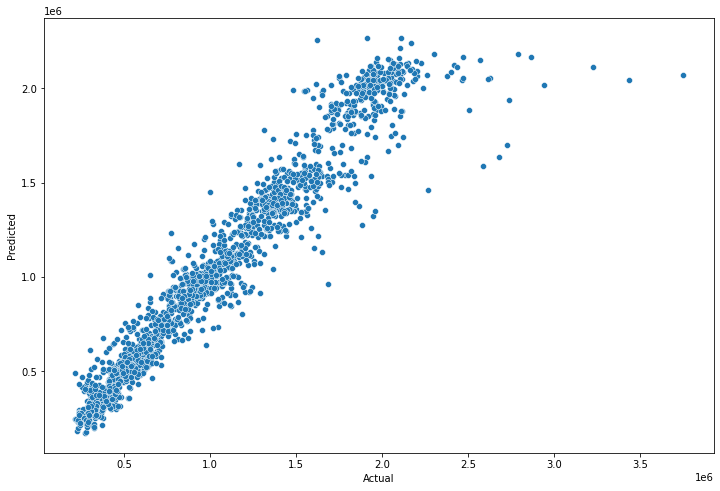

In [14]:
plt.figure(figsize=[12, 8])

sns.scatterplot(x="Actual", y="Predicted", data=predict_vs_actual_df)

plt.show()

#### Coefficients are obtained. 

- High sales stores seems to be highest predictive power (these have the highest positive and negative coefficients). 
- The other macroeconomic variables are having lower predictive power
* https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

In [15]:
coefficients = pd.Series(pipeline["model"].coef_, predictors).sort_values(ascending=False)

print(coefficients.to_string())

one_hot_enc__Store_4       1.653588e+06
one_hot_enc__Store_13      1.624064e+06
one_hot_enc__Store_10      1.599485e+06
one_hot_enc__Store_27      1.287717e+06
one_hot_enc__Store_28      1.187294e+06
one_hot_enc__Store_19      1.007238e+06
one_hot_enc__Store_24      9.609493e+05
one_hot_enc__Store_14      9.596255e+05
one_hot_enc__Store_12      8.653327e+05
one_hot_enc__Store_23      7.810321e+05
one_hot_enc__Store_34      7.577784e+05
one_hot_enc__Store_18      7.077292e+05
one_hot_enc__Store_20      6.328482e+05
one_hot_enc__Store_22      5.646946e+05
one_hot_enc__Store_26      5.634930e+05
one_hot_enc__Store_35      4.893438e+05
one_hot_enc__Store_17      4.806054e+05
one_hot_enc__Store_38      3.616590e+05
one_hot_enc__Store_2       3.582315e+05
one_hot_enc__Store_40      3.402433e+05
one_hot_enc__Store_42      2.560797e+05
one_hot_enc__Store_29      2.196586e+05
one_hot_enc__Store_15      1.999914e+05
one_hot_enc__Month_12      1.141183e+05
one_hot_enc__Quarter_4     1.056838e+05


Manual Feature selection- As from the correlation heatmap previously obtained , it can be seen that Rsquare for any of the Continuous vars will be very low. We have taken CPI and Unemployment as predictors.Also, Test set is transformed

In [16]:
transformed_X_test = pd.DataFrame(transformer.transform(X_test), 
                                  columns=transformer.get_feature_names_out(), 
                                  index=X_test.index)

transformed_X_test.head(10) 

,one_hot_enc__Store_2,one_hot_enc__Store_3,one_hot_enc__Store_4,one_hot_enc__Store_5,one_hot_enc__Store_6,one_hot_enc__Store_7,one_hot_enc__Store_8,one_hot_enc__Store_9,one_hot_enc__Store_10,one_hot_enc__Store_11,...,one_hot_enc__Quarter_2,one_hot_enc__Quarter_3,one_hot_enc__Quarter_4,one_hot_enc__Year_2011,one_hot_enc__Year_2012,remainder__Holiday_Flag,remainder__Temperature,remainder__Fuel_Price,remainder__CPI,remainder__Unemployment
1610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,45.12,2.841,126.436419,7.795
4837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45.66,2.514,210.045102,8.554
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,52.89,4.153,138.833613,7.992
3485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,28.24,3.445,136.533516,7.598
2228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,61.48,3.641,129.430600,6.745
5338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,37.21,3.095,196.545831,6.589
1780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,58.21,4.046,185.937438,8.521
3243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,52.59,4.153,138.833613,8.693
4322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,63.34,3.716,128.616064,8.951
1631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,42.38,3.435,128.616064,7.470


In [19]:
X_train = transformed_X_train[['remainder__CPI', 'remainder__Unemployment']]

model = LinearRegression()
model.fit(X_train, y_train)

print("Training Score: ", model.score(X_train, y_train))

Training Score:  0.020025680035091642


Predictive power seems to be very low.

In [20]:
X_test = transformed_X_test[['remainder__CPI', 'remainder__Unemployment']]

y_pred = model.predict(X_test)

print("Testing Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Testing Score:  0.008102959112046726
MAE:  469195.93715924653
RMSE:  559686.3523473517


Adding the other macroeconomic predictors does not improve R-square

In [21]:
X_train = transformed_X_train[['remainder__Temperature','remainder__Fuel_Price', 
                               'remainder__CPI', 'remainder__Unemployment']]

model = LinearRegression()
model.fit(X_train, y_train)

print("Training Score: ", model.score(X_train, y_train))

Training Score:  0.021128053107485778


In [22]:
X_test = transformed_X_test[['remainder__Temperature','remainder__Fuel_Price', 
                             'remainder__CPI', 'remainder__Unemployment']]

y_pred = model.predict(X_test)

print("Testing Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Testing Score:  0.009824716365513186
MAE:  469649.53727613005
RMSE:  559200.3832703312


#### here we are using only Store to see the performance
*  we are using only one categorical column ie Store. Note that In a Linear Regression model, if only predictor is categorical, then its avg value determines the predictive power.
The R square is very high. So including other variables slightly improve performance.

In [23]:
X_train = transformed_X_train[['one_hot_enc__Store_2', 'one_hot_enc__Store_3', 
                               'one_hot_enc__Store_4', 'one_hot_enc__Store_5', 
                               'one_hot_enc__Store_6', 'one_hot_enc__Store_7',
                               'one_hot_enc__Store_8', 'one_hot_enc__Store_9', 
                               'one_hot_enc__Store_10', 'one_hot_enc__Store_11', 
                               'one_hot_enc__Store_12', 'one_hot_enc__Store_13', 
                               'one_hot_enc__Store_14', 'one_hot_enc__Store_15', 
                               'one_hot_enc__Store_16', 'one_hot_enc__Store_17', 
                               'one_hot_enc__Store_18', 'one_hot_enc__Store_19', 
                               'one_hot_enc__Store_20', 'one_hot_enc__Store_21', 
                               'one_hot_enc__Store_22', 'one_hot_enc__Store_23', 
                               'one_hot_enc__Store_24', 'one_hot_enc__Store_25', 
                               'one_hot_enc__Store_26', 'one_hot_enc__Store_27', 
                               'one_hot_enc__Store_28', 'one_hot_enc__Store_29', 
                               'one_hot_enc__Store_30', 'one_hot_enc__Store_31',
                               'one_hot_enc__Store_32', 'one_hot_enc__Store_33', 
                               'one_hot_enc__Store_34', 'one_hot_enc__Store_35', 
                               'one_hot_enc__Store_36', 'one_hot_enc__Store_37',
                               'one_hot_enc__Store_38', 'one_hot_enc__Store_39', 
                               'one_hot_enc__Store_40', 'one_hot_enc__Store_41', 
                               'one_hot_enc__Store_42','one_hot_enc__Store_43',
                               'one_hot_enc__Store_44','one_hot_enc__Store_45']] 

X_train

,one_hot_enc__Store_2,one_hot_enc__Store_3,one_hot_enc__Store_4,one_hot_enc__Store_5,one_hot_enc__Store_6,one_hot_enc__Store_7,one_hot_enc__Store_8,one_hot_enc__Store_9,one_hot_enc__Store_10,one_hot_enc__Store_11,...,one_hot_enc__Store_36,one_hot_enc__Store_37,one_hot_enc__Store_38,one_hot_enc__Store_39,one_hot_enc__Store_40,one_hot_enc__Store_41,one_hot_enc__Store_42,one_hot_enc__Store_43,one_hot_enc__Store_44,one_hot_enc__Store_45
422,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Training Score: ", model.score(X_train, y_train))

Training Score:  0.9167969996233557


In [25]:
X_test = transformed_X_test[['one_hot_enc__Store_2', 'one_hot_enc__Store_3', 
                               'one_hot_enc__Store_4', 'one_hot_enc__Store_5', 
                               'one_hot_enc__Store_6', 'one_hot_enc__Store_7',
                               'one_hot_enc__Store_8', 'one_hot_enc__Store_9', 
                               'one_hot_enc__Store_10', 'one_hot_enc__Store_11', 
                               'one_hot_enc__Store_12', 'one_hot_enc__Store_13', 
                               'one_hot_enc__Store_14', 'one_hot_enc__Store_15', 
                               'one_hot_enc__Store_16', 'one_hot_enc__Store_17', 
                               'one_hot_enc__Store_18', 'one_hot_enc__Store_19', 
                               'one_hot_enc__Store_20', 'one_hot_enc__Store_21', 
                               'one_hot_enc__Store_22', 'one_hot_enc__Store_23', 
                               'one_hot_enc__Store_24', 'one_hot_enc__Store_25', 
                               'one_hot_enc__Store_26', 'one_hot_enc__Store_27', 
                               'one_hot_enc__Store_28', 'one_hot_enc__Store_29', 
                               'one_hot_enc__Store_30', 'one_hot_enc__Store_31',
                               'one_hot_enc__Store_32', 'one_hot_enc__Store_33', 
                               'one_hot_enc__Store_34', 'one_hot_enc__Store_35', 
                               'one_hot_enc__Store_36', 'one_hot_enc__Store_37',
                               'one_hot_enc__Store_38', 'one_hot_enc__Store_39', 
                               'one_hot_enc__Store_40', 'one_hot_enc__Store_41', 
                               'one_hot_enc__Store_42','one_hot_enc__Store_43',
                               'one_hot_enc__Store_44','one_hot_enc__Store_45']] 

y_pred = model.predict(X_test)

print("Testing Score: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

Testing Score:  0.9186362112411394
MAE:  87929.0275986918
RMSE:  160297.59313317438


So higher sales means high values of coefficients. This list very much matches with Store Sales value in descending order obtained in exploration

In [26]:
coefficients = pd.Series(model.coef_, X_train.columns).sort_values(ascending=False)

print(coefficients.to_string())

one_hot_enc__Store_20    5.615872e+05
one_hot_enc__Store_4     5.407735e+05
one_hot_enc__Store_14    4.995800e+05
one_hot_enc__Store_13    4.611003e+05
one_hot_enc__Store_2     3.423709e+05
one_hot_enc__Store_10    3.372865e+05
one_hot_enc__Store_27    2.099140e+05
one_hot_enc__Store_6    -2.258661e+03
one_hot_enc__Store_39   -9.680591e+04
one_hot_enc__Store_19   -1.195338e+05
one_hot_enc__Store_23   -1.509711e+05
one_hot_enc__Store_31   -1.578695e+05
one_hot_enc__Store_24   -1.981581e+05
one_hot_enc__Store_11   -2.050236e+05
one_hot_enc__Store_41   -2.945135e+05
one_hot_enc__Store_28   -2.951384e+05
one_hot_enc__Store_32   -4.032346e+05
one_hot_enc__Store_18   -4.794198e+05
one_hot_enc__Store_22   -5.209045e+05
one_hot_enc__Store_26   -5.575798e+05
one_hot_enc__Store_34   -5.738150e+05
one_hot_enc__Store_40   -5.981826e+05
one_hot_enc__Store_12   -6.048708e+05
one_hot_enc__Store_35   -6.341235e+05
one_hot_enc__Store_8    -6.382151e+05
one_hot_enc__Store_17   -6.614267e+05
one_hot_enc_